# **Monte Carlo Simulation**

## Implements a Monte Carlo Simulation to estimate value of pi

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import islice
from functools import reduce
from operator import xor

import sys, os
sys.path.append(os.path.abspath("../"))
from Cangini import RC4
from Cangini import StreamCipher, A5_1

from Cryptodome.Cipher import AES

In [2]:
key = b'05289604D4C78EEA'
rand_byte = RC4(key, drop=3072)

print(int(next(rand_byte)))

170


In [3]:
tot_points = 1000
int_points = 0

for it in range(tot_points):
    x = int(next(rand_byte)) / 256.0
    y = int(next(rand_byte)) / 256.0
    
    if np.sqrt(x**2 + y**2) <= 1:
        int_points += 1

pi = 4 * int_points / tot_points
print(f'Pi estimation: {pi:f}')

Pi estimation: 3.124000


## Diffusion of AES with Monte Carlo

In [2]:
def print_bin(msg):
    '''Print binary sequence from byte string'''
    print(''.join(f'{ch:b}' for ch in msg))

In [3]:
message = b'0123456765432100'
key = b'0123456701234567'
alice = AES.new(key, AES.MODE_ECB)
bob = AES.new(key, AES.MODE_ECB)

#plainA = message.encode('utf-8')
ciphert = alice.encrypt(message)
plain = bob.decrypt(ciphert)

print(message)
print_bin(ciphert)
print(plain)

b'0123456765432100'
1001100001110100011011011111101011010111111100111011010101010011111100110100000011011000010110010111101110010110
b'0123456765432100'


In [8]:
def find_diff(str1, str2):
    '''Find # of bits that differs from one sequence to another'''
    s_str1 = ''.join(f'{ch:b}' for ch in str1)
    s_str2 = ''.join(f'{ch:b}' for ch in str2)
    
    diff = 0
    for bi1, bi2 in zip(s_str1, s_str2):
        if bi1 != bi2:
            diff += 1
    return diff

In [7]:
# Check function implementation
find_diff(b'10', b'01')

2

### Average diff implementation

In [6]:
tot_iters = 1000

key = b'05289604D4C78EEA'
rand_byte = RC4(key, drop=3072)

Generate random 128-bit key

In [37]:
key = bytearray(b'')
for _ in range(16):
    #key.append(next(rand_byte).to_bytes(1, 'big'))
    key += next(rand_byte).to_bytes(1, 'big')

print(key)
print(bytes([key[2]]))

bytearray(b';\x07\xcc\xe9\xc6\x0bm8\xab\x8bc\xf9\x85\xe3\x8d\xc9')
b'\xcc'


In [4]:
def gen_random_128bits(byte_generator):
    key = bytearray(b'')
    for _ in range(16):
        #key.append(next(rand_byte).to_bytes(1, 'big'))
        key += next(byte_generator).to_bytes(1, 'big')
    return key

Average diff bits: 52.9341


(array([  25.,  228.,  758., 1779., 2568., 2949., 1222.,  375.,   79.,
          17.]),
 array([33. , 37.2, 41.4, 45.6, 49.8, 54. , 58.2, 62.4, 66.6, 70.8, 75. ]),
 <BarContainer object of 10 artists>)

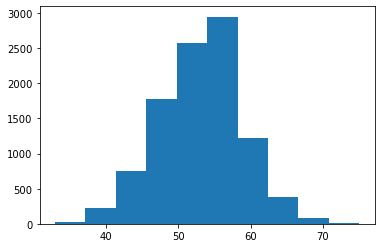

In [10]:
diff_bits = 0
tot_points = 10000
dist = []

for it in range(tot_points):
    key = gen_random_128bits(rand_byte)
    ciph = AES.new(key, AES.MODE_ECB)
    
    plain1 = bytes(gen_random_128bits(rand_byte))
    byte_to_change = next(rand_byte) % 16
    plain2 = bytearray(b'')
    
    for it, kk in zip(range(16), plain1):
        plain2 += bytes([plain1[it]])
        
        if it == byte_to_change:
            plain2[it] = plain1[it] ^ (1<<(next(rand_byte) % 8))
    
    cipher_t1 = ciph.encrypt(plain1)
    cipher_t2 = ciph.encrypt(plain2)
    
    dd = find_diff(cipher_t1, cipher_t2)
    dist.append(dd)
    diff_bits += dd

average = diff_bits / tot_points
print(f'Average diff bits: {average}')

plt.hist(dist)

Average diff bits: 52.878


(array([  19.,  141.,  547., 1529., 2457., 2639., 1740.,  723.,  177.,
          28.]),
 array([33. , 36.9, 40.8, 44.7, 48.6, 52.5, 56.4, 60.3, 64.2, 68.1, 72. ]),
 <BarContainer object of 10 artists>)

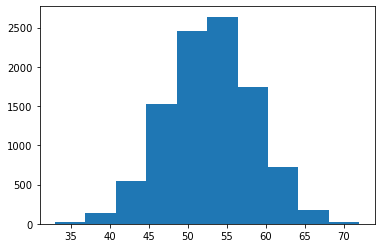

In [14]:
diff_bits = 0
tot_points = 10000
dist = []

for it in range(tot_points):
    plain = gen_random_128bits(rand_byte)
    
    key1 = bytes(gen_random_128bits(rand_byte))
    byte_to_change = next(rand_byte) % 16
    key2 = bytearray(b'')
    
    for it, kk in zip(range(16), key1):
        key2 += bytes([key1[it]])
        
        if it == byte_to_change:
            key2[it] = key1[it] ^ (1<<(next(rand_byte) % 8))
    
    ciph1 = AES.new(key1, AES.MODE_CBC)
    ciph2 = AES.new(key2, AES.MODE_CBC)
    
    cipher_t1 = ciph1.encrypt(plain)
    cipher_t2 = ciph2.encrypt(plain)
    
    dd = find_diff(cipher_t1, cipher_t2)
    dist.append(dd)
    diff_bits += dd

average = diff_bits / tot_points
print(f'Average diff bits: {average}')

plt.hist(dist)

(array([1005.,  958., 1023.,  945., 1001.,  994., 1035.,  980., 1040.,
        1019.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

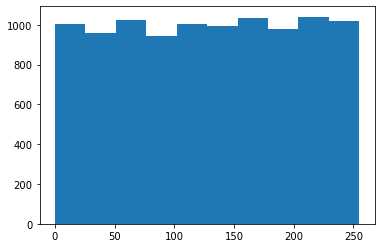

In [12]:
nums = []
for it in range(10000):
    nums.append(next(rand_byte))
    
plt.hist(nums)